#####                                                                                                                                                                                                               By: Sudip PANDIT**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
df = pd.read_csv('diabetes.csv')
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1


In [25]:
df.isnull().sum()

BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [26]:
x_var = df.drop('Outcome', axis=1)
y_var= df['Outcome']

In [27]:
x_var.shape, y_var.shape

((768, 6), (768,))

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_var)
x_var=scaler.transform(x_var)

In [33]:
x_var

array([[0.59016393, 0.35353535, 0.        , 0.50074516, 0.23441503,
        0.48333333],
       [0.54098361, 0.29292929, 0.        , 0.39642325, 0.11656704,
        0.16666667],
       [0.52459016, 0.        , 0.        , 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.59016393, 0.23232323, 0.13238771, 0.390462  , 0.07130658,
        0.15      ],
       [0.49180328, 0.        , 0.        , 0.4485842 , 0.11571307,
        0.43333333],
       [0.57377049, 0.31313131, 0.        , 0.45305514, 0.10119556,
        0.03333333]])

In [34]:
from sklearn.manifold import TSNE

In [37]:
tsne=TSNE(perplexity=40, n_iter=4000)
x=tsne.fit_transform(x_var)

In [41]:
from sklearn.cluster import KMeans
kmns=KMeans(n_clusters=2)

In [42]:
kmns.fit(x)
ky=kmns.predict(x)

Text(0.5, 1.0, 'Actual Cluster')

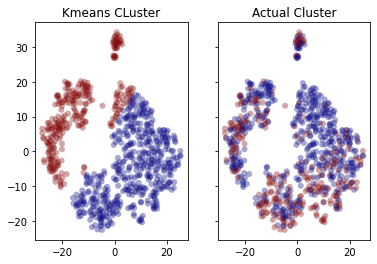

In [64]:
f, (ax1,ax2)=plt.subplots(1,2, sharey=True)
ax1.scatter(x[:,0], x[:,1], c=ky, cmap='jet', edgecolor='None', alpha=0.35)
ax1.set_title('Kmeans CLuster')

ax2.scatter(x[:,0], x[:,1], c=y_var, cmap='jet', edgecolor='None', alpha=0.35)
ax2.set_title('Actual Cluster')